In [28]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [29]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labeles = synthetic_data(true_w, true_b, 1000)
    

In [30]:
print('features:', features, '\nlabel:', labeles[0])

features: tensor([[-0.8345, -1.2435],
        [ 0.4991,  0.2031],
        [ 1.7605, -0.5562],
        ...,
        [ 0.1705, -1.0604],
        [ 2.6975,  1.3384],
        [-0.2686, -0.5736]]) 
label: tensor([6.7454])


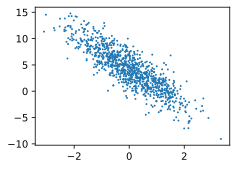

In [31]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labeles.detach().numpy(), 1);

In [32]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [33]:
batch_size = 10
for X, y in data_iter(batch_size, features, labeles):
    print(X, '\n', y)
    break

tensor([[-0.4599,  1.3233],
        [ 0.5478,  0.6244],
        [ 0.9882,  1.2130],
        [-0.3618,  0.2489],
        [-0.1760,  1.1472],
        [-0.5253,  0.0733],
        [-0.0845,  1.2717],
        [ 2.0414, -0.1188],
        [-0.9276, -1.7942],
        [-0.2392, -2.5279]]) 
 tensor([[-1.2258],
        [ 3.1786],
        [ 2.0496],
        [ 2.6320],
        [-0.0591],
        [ 2.8883],
        [-0.2985],
        [ 8.6943],
        [ 8.4332],
        [12.3100]])


In [34]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [35]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [36]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [37]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [38]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labeles):
        l = loss(net(X, w, b), y)
        l.sum().backward()

        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labeles)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.042140
epoch 2, loss 0.000164
epoch 3, loss 0.000048


In [39]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0009, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0010], grad_fn=<RsubBackward1>)
